In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import tensorflow as tf

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [106]:
tweets= pd.read_csv('stock_tweets.csv')
tweets

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [107]:
print(tweets['Stock Name'].value_counts())
print(tweets['Stock Name'].unique(), "\nUnique_Stocks:",len(tweets['Stock Name'].unique()), end='\n')

Stock Name
TSLA    37422
TSM     11034
AAPL     5056
PG       4089
AMZN     4089
MSFT     4089
NIO      3021
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
NOC        31
F          31
Name: count, dtype: int64
['TSLA' 'MSFT' 'PG' 'META' 'AMZN' 'GOOG' 'AMD' 'AAPL' 'NFLX' 'TSM' 'KO'
 'F' 'COST' 'DIS' 'VZ' 'CRM' 'INTC' 'BA' 'BX' 'NOC' 'PYPL' 'ENPH' 'NIO'
 'ZS' 'XPEV'] 
Unique_Stocks: 25


In [108]:
tweets_tesla= tweets.loc[tweets['Stock Name']=='TSLA']
tweets_tesla

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc."
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc."
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc."
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc."


### Building the Complete Tweets data with it's sentiment Scores for tesla 

In [109]:
tweets_tesla["sentiment_score"] = ''
tweets_tesla["Negative"] = ''
tweets_tesla["Neutral"] = ''
tweets_tesla["Positive"] = ''

C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\460025587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_tesla["sentiment_score"] = ''
C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\460025587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_tesla["Negative"] = ''
C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\460025587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [110]:
tweets_tesla.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",,,,
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",,,,
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",,,,
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",,,,
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",,,,


In [111]:
# calculating the sentiment scores and filling the table
sia = SentimentIntensityAnalyzer()

compoundScore=[]
negScore=[]
neuScore=[]
posScore=[]

for tweet in tweets_tesla['Tweet']:
    sentiment_scores= sia.polarity_scores(tweet)
    compoundScore.append(sentiment_scores['compound'])
    negScore.append(sentiment_scores['neg'])
    neuScore.append(sentiment_scores['neu'])
    posScore.append(sentiment_scores['pos'])

tweets_tesla['sentiment_score']=compoundScore
tweets_tesla['Negative']=negScore
tweets_tesla['Neutral']=neuScore
tweets_tesla['Positive']=posScore

C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\1720216096.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_tesla['sentiment_score']=compoundScore
C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\1720216096.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_tesla['Negative']=negScore
C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\1720216096.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [112]:
tweets_tesla['Date']=pd.to_datetime(tweets_tesla['Date'])
tweets_tesla['Date']=tweets_tesla['Date'].dt.date

C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\177797796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_tesla['Date']=pd.to_datetime(tweets_tesla['Date'])
C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\177797796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_tesla['Date']=tweets_tesla['Date'].dt.date


In [113]:
tweets_tesla.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.127,0.758,0.115
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,0.000,1.000,0.000
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,0.000,0.951,0.049
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.273,0.590,0.137
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,0.526,0.474,0.000


In [114]:
tweets_tesla= tweets_tesla[['Date', 'sentiment_score', 'Negative', 'Neutral', 'Positive']]
tweets_tesla

,Date,sentiment_score,Negative,Neutral,Positive
0,2022-09-29,0.0772,0.127,0.758,0.115
1,2022-09-29,0.0000,0.000,1.000,0.000
2,2022-09-29,0.2960,0.000,0.951,0.049
3,2022-09-29,-0.7568,0.273,0.590,0.137
4,2022-09-29,-0.8750,0.526,0.474,0.000
...,...,...,...,...,...
37417,2021-09-30,-0.1531,0.197,0.656,0.148
37418,2021-09-30,0.5719,0.078,0.747,0.175
37419,2021-09-30,0.0000,0.000,1.000,0.000
37420,2021-09-30,0.4215,0.000,0.743,0.257


In [115]:
tweets_tesla_df = tweets_tesla.groupby([tweets_tesla['Date']]).mean()
tweets_tesla_df.head()

,sentiment_score,Negative,Neutral,Positive
Date,,,,
2021-09-30,0.231552,0.064778,0.810011,0.125233
2021-10-01,0.233704,0.033989,0.865691,0.100287
2021-10-02,0.271889,0.032043,0.834216,0.133750
2021-10-03,0.271570,0.038738,0.831049,0.130213
2021-10-04,0.135388,0.041076,0.869084,0.089849


### Preparing our final TSLA stocks data to work with

In [116]:
stocks= pd.read_csv('stock_yfinance_data.csv')
stocksTesla=stocks.loc[stocks['Stock Name']=='TSLA']
stocksTesla

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA


In [117]:
# correcting the format of datetime column and storing only dates
stocksTesla['Date']=pd.to_datetime(stocksTesla['Date']).dt.date
stocksTesla


C:\Users\thaku\AppData\Local\Temp\ipykernel_18960\3835656183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocksTesla['Date']=pd.to_datetime(stocksTesla['Date']).dt.date


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA


#### Joining the Sentiments with the TSLA stock's corresponding Date

In [118]:
final_Tesla_df = stocksTesla.join(tweets_tesla_df, how="left", on="Date")
final_Tesla_df.drop(columns=['Stock Name'], inplace=True)
final_Tesla_df

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score,Negative,Neutral,Positive
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.231552,0.064778,0.810011,0.125233
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.233704,0.033989,0.865691,0.100287
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.135388,0.041076,0.869084,0.089849
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,0.069445,0.062205,0.849716,0.088023
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,0.199940,0.038692,0.836346,0.125026
...,...,...,...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,0.143601,0.051826,0.851256,0.096895
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,0.145532,0.052569,0.829917,0.117500
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,0.188188,0.039212,0.858753,0.101988
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,0.127383,0.063947,0.846720,0.089373


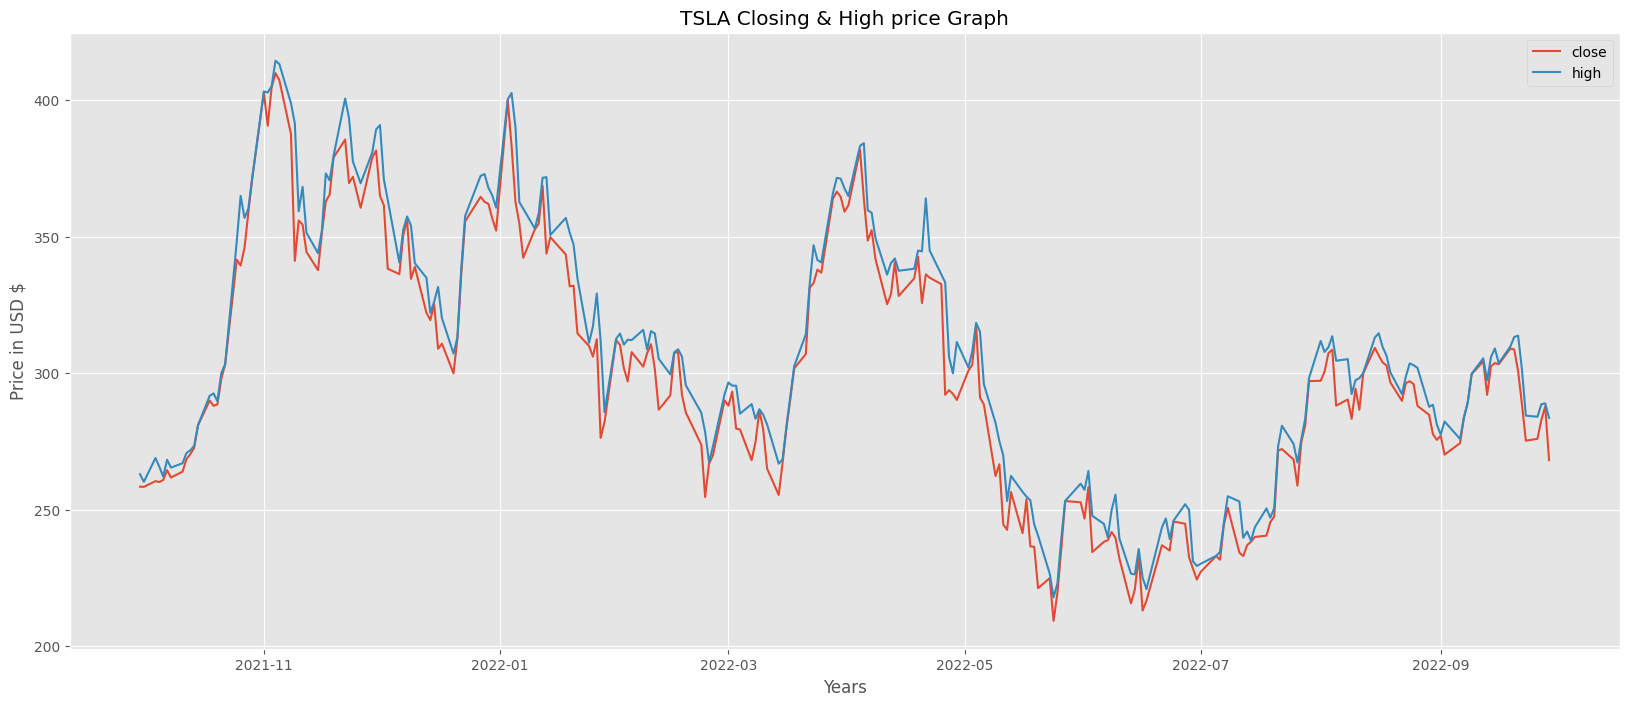

In [119]:
from matplotlib.dates import DateFormatter
plt.figure(figsize=(20,8))
plt.plot(final_Tesla_df['Date'], final_Tesla_df['Close'])
plt.plot(final_Tesla_df['Date'],final_Tesla_df['High'])
plt.xlabel("Years")
plt.ylabel("Price in USD $")
plt.title("TSLA Closing & High price Graph")
plt.legend(["close", "high"])
plt.show()

Visualizing the Correlation b/w the features

In [120]:
df_corr= stocksTesla.drop(columns=['Date', 'Stock Name', 'Volume']).corr()

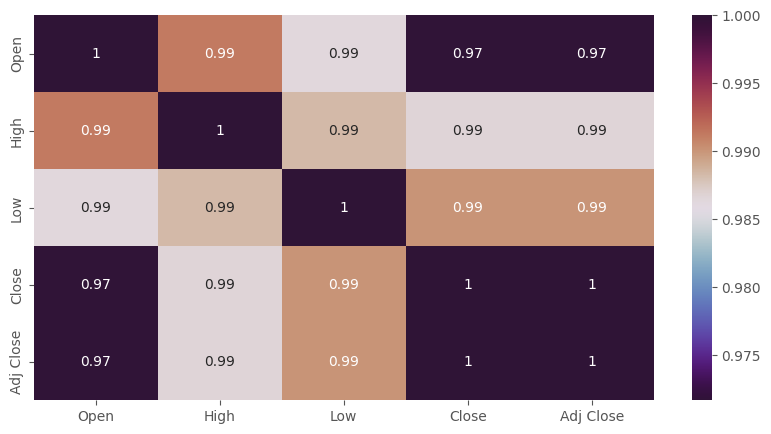

In [121]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr, annot=True, cmap="twilight_shifted")
plt.show()

<Axes: >

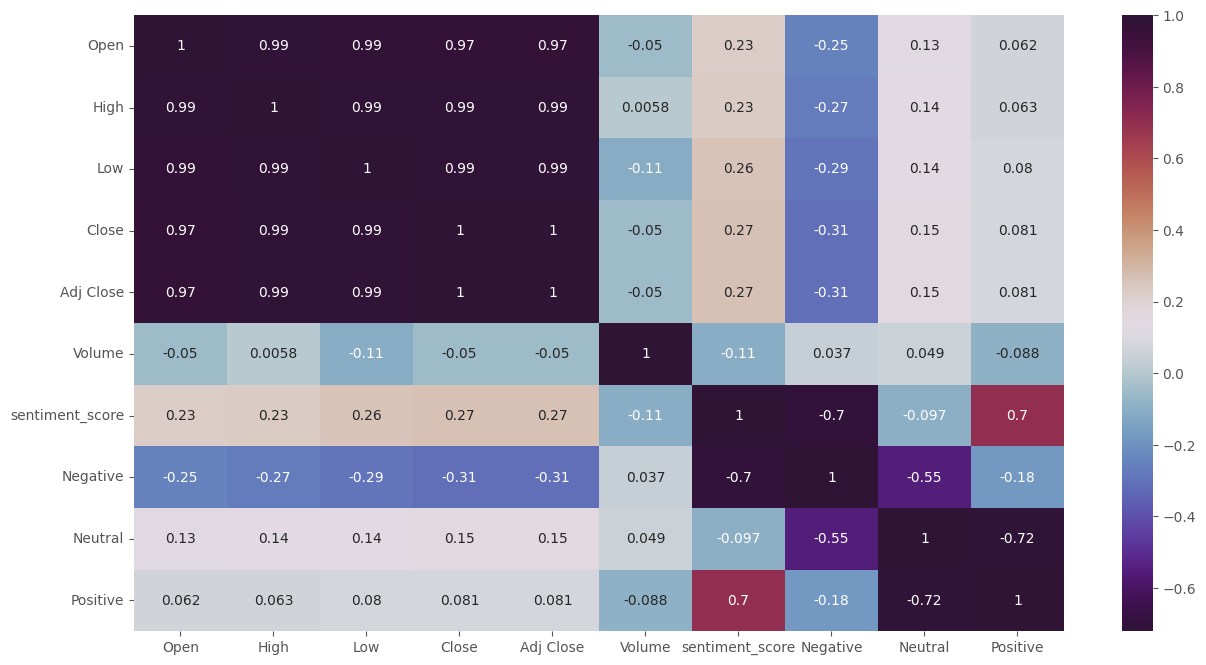

In [224]:
plt.figure(figsize=(15,8))
sns.heatmap(final_Tesla_df.drop(columns=['Date']).corr(), annot=True, cmap="twilight_shifted")

# Building the LSTM model

In [122]:
final_Tesla_df

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score,Negative,Neutral,Positive
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.231552,0.064778,0.810011,0.125233
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.233704,0.033989,0.865691,0.100287
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.135388,0.041076,0.869084,0.089849
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,0.069445,0.062205,0.849716,0.088023
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,0.199940,0.038692,0.836346,0.125026
...,...,...,...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,0.143601,0.051826,0.851256,0.096895
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,0.145532,0.052569,0.829917,0.117500
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,0.188188,0.039212,0.858753,0.101988
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,0.127383,0.063947,0.846720,0.089373


In [123]:
X_all= final_Tesla_df.drop(columns=['Adj Close'])
y_all= final_Tesla_df['Adj Close'] 

In [143]:
X_all.shape, y_all.shape

((252, 10), (252,))

In [176]:
features = ['Open', 'High', 'Low', 'Volume', 'Negative', 'Neutral', 'Positive']
target = 'Adj Close'

# Define timesteps
timesteps = 1

# Create features (X) and target values (y) 
dates_all=[]
X = []
y = []
for i in range(timesteps, len(final_Tesla_df)):
    X.append(final_Tesla_df[features].iloc[i-timesteps:i].values)
    y.append(final_Tesla_df.loc[i, target])
    dates_all.append(final_Tesla_df.loc[i, 'Date'])
X, y, dates_all = np.array(X), np.array(y), np.array(dates_all) 


In [177]:
X.shape, y.shape, dates_all.shape

((251, 1, 7), (251,), (251,))

In [178]:
# Split data (non-randomly)

q_80 = int(0.8 * len(X)) 
q_90 = int(len(X) * .9)
X_train, X_val, X_test = X[:q_80], X[q_80:q_90], X[q_90:]
y_train, y_val, y_test = y[:q_80], y[q_80:q_90], y[q_90:]


In [179]:
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1]))

# Reshape for LSTM 
X_train = X_train.reshape((X_train.shape[0], timesteps, X_train.shape[-1]))
X_val = X_val.reshape((X_val.shape[0], timesteps, X_val.shape[-1]))

In [180]:
X_train.shape, X_val.shape

((200, 1, 7), (25, 1, 7))

In [196]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Build the LSTM Model (only once)
model = Sequential()
model.add(LSTM(units=1000, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=500, return_sequences=True))
model.add(LSTM(units=250))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [197]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 1, 1000)           4032000   
                                                                 
 lstm_52 (LSTM)              (None, 1, 500)            3002000   
                                                                 
 lstm_53 (LSTM)              (None, 250)               751000    
                                                                 
 dense_39 (Dense)            (None, 200)               50200     
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_40 (Dense)            (None, 256)               51456     
                                                                 
 dense_41 (Dense)            (None, 256)             

In [198]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_val, y_val))

Epoch 1/100
10/10 [==============================] - 8s 214ms/step - loss: 93840.5234 - val_loss: 82041.3047
Epoch 2/100
10/10 [==============================] - 1s 53ms/step - loss: 65025.1133 - val_loss: 377.3079
Epoch 3/100
10/10 [==============================] - 1s 70ms/step - loss: 10704.5615 - val_loss: 8557.3311
Epoch 4/100
10/10 [==============================] - 1s 58ms/step - loss: 4749.3745 - val_loss: 1294.7959
Epoch 5/100
10/10 [==============================] - 1s 58ms/step - loss: 2807.6438 - val_loss: 762.9920
Epoch 6/100
10/10 [==============================] - 1s 59ms/step - loss: 2095.2229 - val_loss: 206.5868
Epoch 7/100
10/10 [==============================] - 1s 55ms/step - loss: 1843.2794 - val_loss: 138.6773
Epoch 8/100
10/10 [==============================] - 1s 57ms/step - loss: 1670.1379 - val_loss: 427.7161
Epoch 9/100
10/10 [==============================] - 1s 60ms/step - loss: 1718.3275 - val_loss: 148.9159
Epoch 10/100
10/10 [===========================

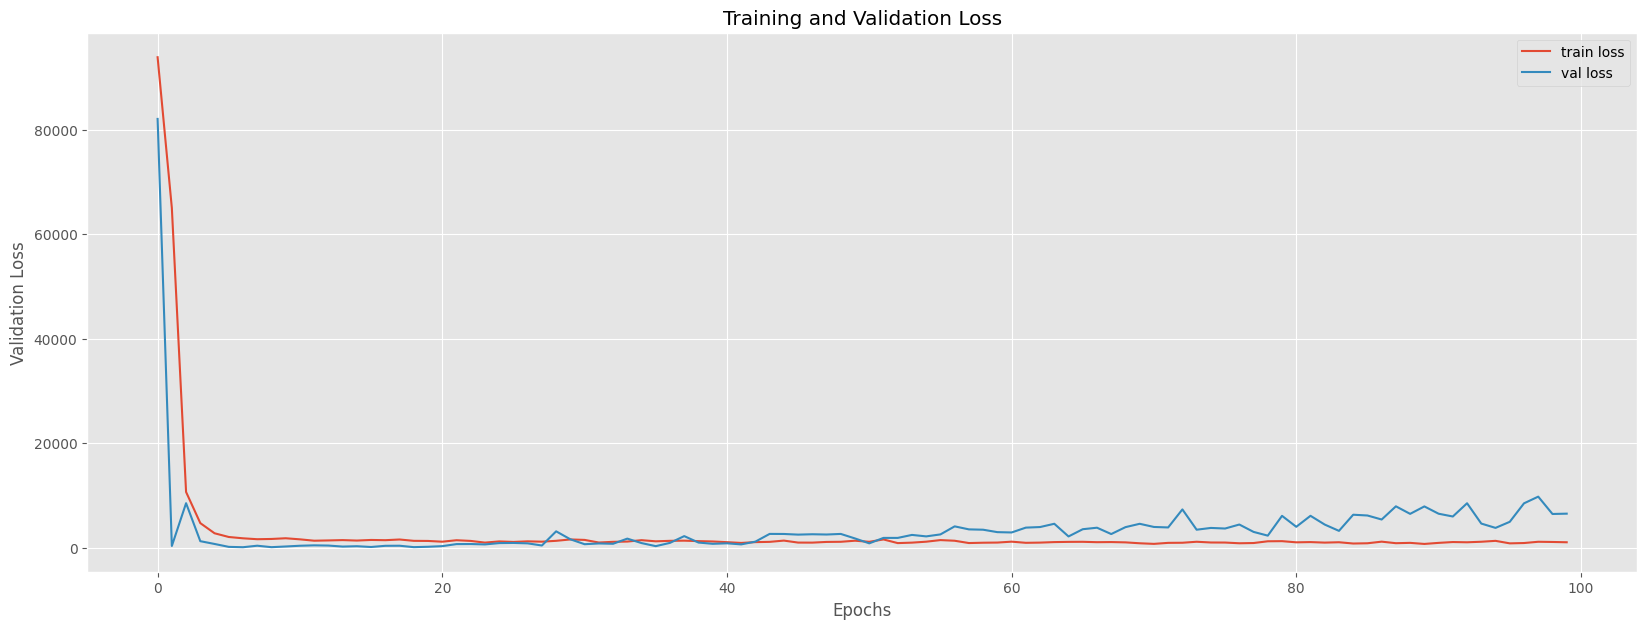

In [200]:
# plotting the graphs

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))
sns.lineplot(history.history['loss'], label='train loss')
sns.lineplot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()


In [201]:
y_pred= model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [202]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

mse= mean_squared_error(y_pred, y_test)
mae= mean_absolute_error(y_pred, y_test)

print("MSE:",mse)
print("MAE:",mae)

MSE: 158.92555027440764
MAE: 10.795893742487978


[]

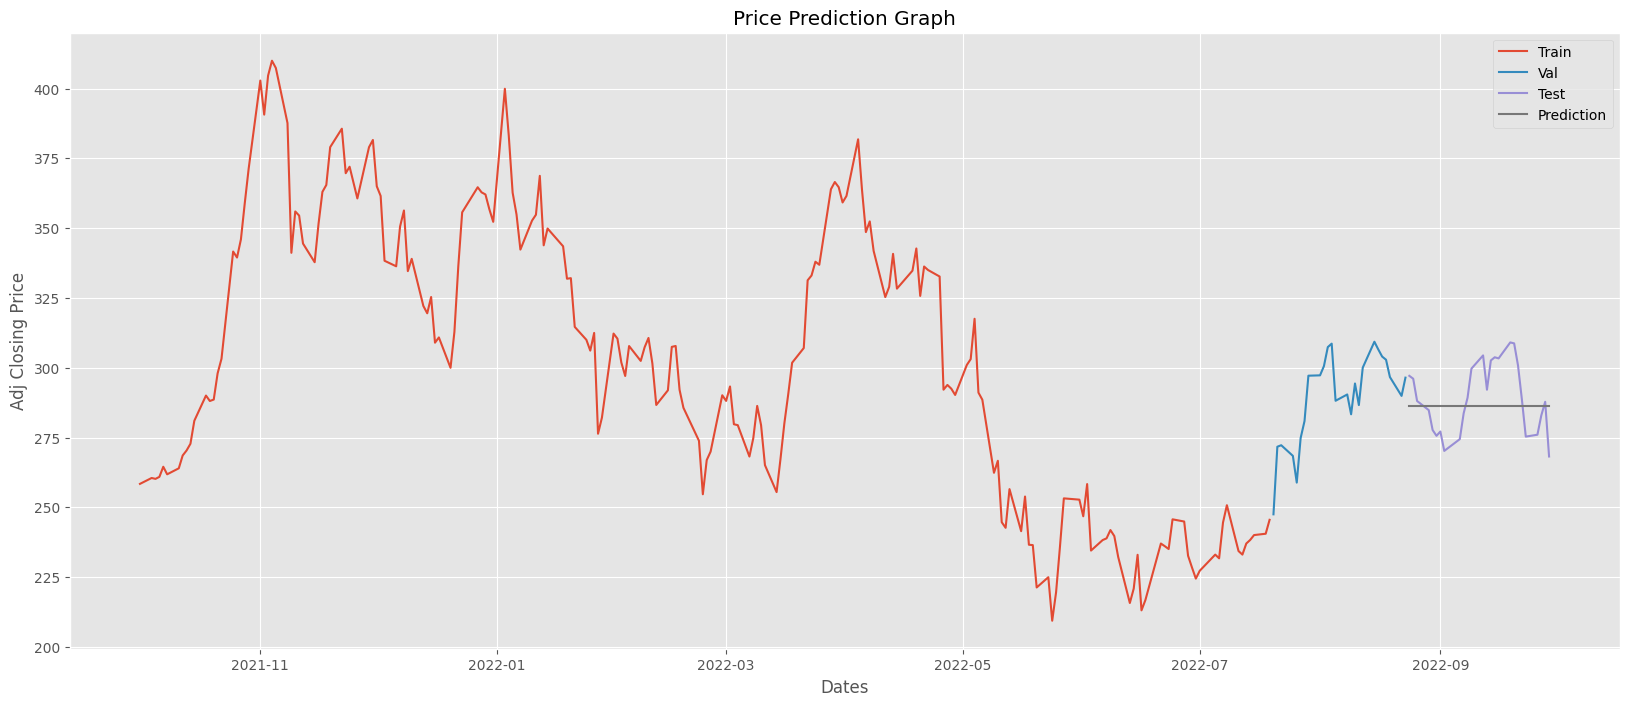

In [203]:
# from matplotlib.dates import DateFormatter

dates_train, dates_val, dates_test = dates_all[:q_80], dates_all[q_80:q_90], dates_all[q_90:]

plt.figure(figsize=(20,8))
plt.plot(dates_train,y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_test, y_pred)
plt.legend(['Train', 'Val', 'Test', 'Prediction'])
plt.title("Price Prediction Graph")
plt.xlabel("Dates")
plt.ylabel("Adj Closing Price")
plt.plot()

In [219]:
# features = ['Open', 'High', 'Low', 'Volume', 'Negative', 'Neutral', 'Positive']

# predicting the closing value

opening= 263
high= 290
low= 261
volume= 51834000
negetive= 0.05
neutral= 0.6
positive= 0.35


values = [opening, high, low, volume, negetive, neutral, positive]
values =np.array(values)

testing = scaler.transform(values.reshape(-1, values.shape[-1]))
testing = testing.reshape((testing.shape[0], timesteps, testing.shape[-1]))



closingValue = model.predict(testing)

1/1 [==============================] - 0s 36ms/step


In [220]:
print("Closing Value based on past data:", closingValue[0][0])

Closing Value based on past data: 160.30743


In [212]:
# model.save("lstmModel.h5")

In [216]:
scaler.get_params(deep=True)

{'clip': False, 'copy': True, 'feature_range': (0, 1)}